## Loading The Dataset

In [3]:
# Importing necessary Library
import pandas as pd

# Loading 
data = pd.read_csv('AirPassengers.csv')

# Displaying the firstt few rows
print(data.head())

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


## Data Preprocessing

In [4]:
# Converting 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')

# Seting 'Month' as the index
data.set_index('Month', inplace=True)

# Checking the result
print(data.head())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


## Visualizing The Data

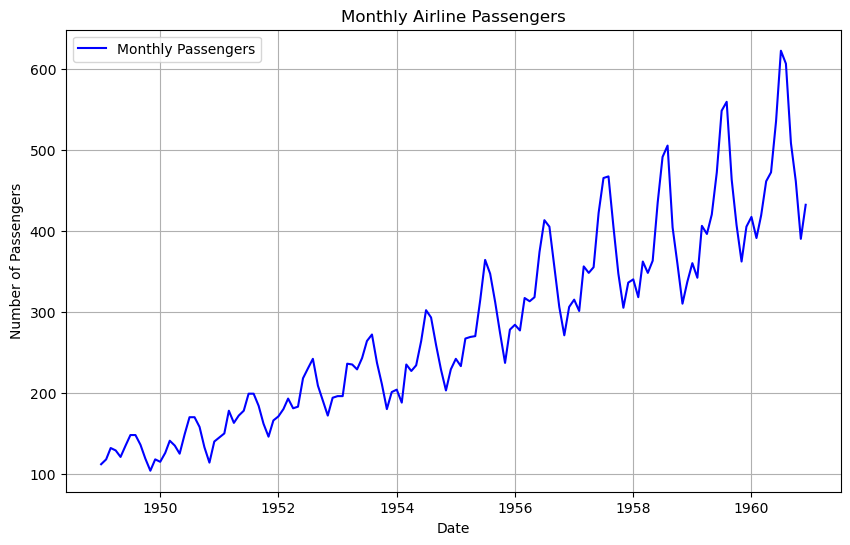

In [5]:
import matplotlib.pyplot as plt

# Ploting the time series data
plt.figure(figsize=(10, 6))
plt.plot(data, label='Monthly Passengers', color='blue')
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()


## Checking for Stationarity

Before we proceed with time series analysis, we need to check if the data is stationary. Stationary means that the data’s mean and variance do not change over time. If the data is not stationary, we need to adjust it before using it for modeling.

The ADF (Augmented Dickey-Fuller) test is used to check if the data is stationary. It will give us a result that tells us if the data is stable or if we need to make adjustments.

# Importing Required Library
from statsmodels.tsa.stattools import adfuller

# Running the  ADF test
result = adfuller(data['Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpreting the result
if result[1] < 0.05:
    print("The data is stationary .")
else:
    print("The data is not stationary.")

## Making the Data Stationary

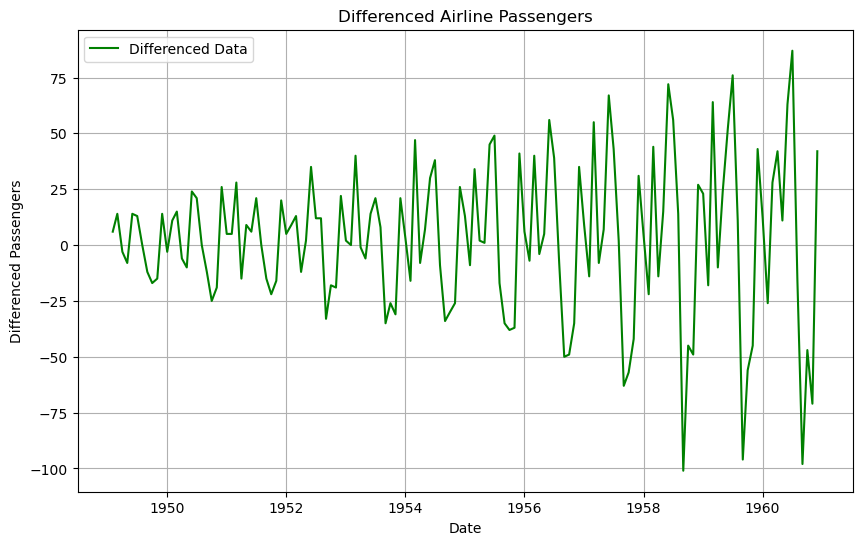

ADF Statistic: -2.829266824169992
p-value: 0.0542132902838265


In [8]:
# Applying first differencing to make the data stationary
data_diff = data['Passengers'].diff().dropna()

# Plotting the differenced data
plt.figure(figsize=(10, 6))
plt.plot(data_diff, label='Differenced Data', color='green')
plt.title('Differenced Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Differenced Passengers')
plt.legend()
plt.grid(True)
plt.show()

# Checking stationarity again with ADF test
result_diff = adfuller(data_diff)
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])


Applying Second Differencing

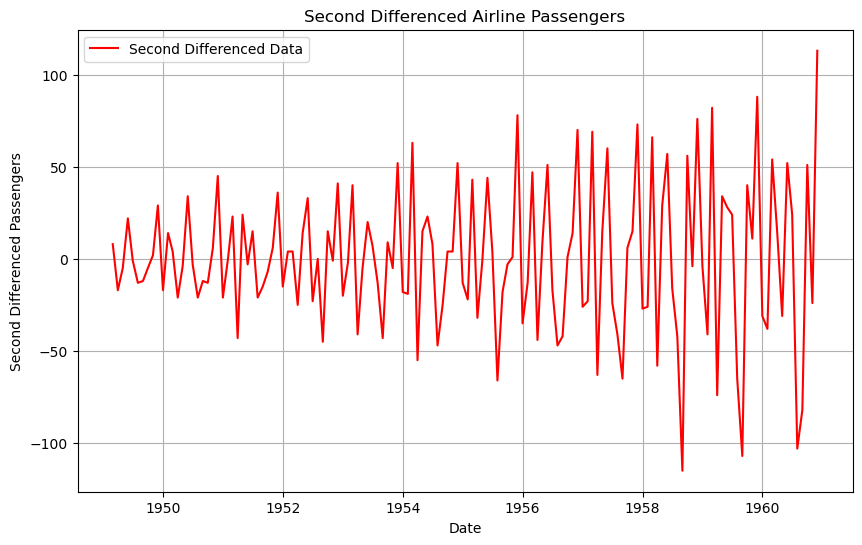

ADF Statistic: -16.384231542468527
p-value: 2.732891850014085e-29


In [9]:
# Applying second differencing to make the data more stationary
data_diff2 = data_diff.diff().dropna()

# Plotting the second differenced data
plt.figure(figsize=(10, 6))
plt.plot(data_diff2, label='Second Differenced Data', color='red')
plt.title('Second Differenced Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Second Differenced Passengers')
plt.legend()
plt.grid(True)
plt.show()

# Checking stationarity again with ADF test
result_diff2 = adfuller(data_diff2)
print('ADF Statistic:', result_diff2[0])
print('p-value:', result_diff2[1])


The Data is now Stationary Since p value is much less than 0.05

## Model Building

Now that the data is stationary, we can proceed with building a model to forecast the time series data.

One popular model for time series forecasting is ARIMA (AutoRegressive Integrated Moving Average). Since we’ve already differenced the data, we can use ARIMA to model it.

ARIMA Model:
ARIMA has three main components:

* AR (AutoRegressive): Models the dependency between an observation and a number of lagged observations.
* I (Integrated): The differencing step we performed earlier to make the data stationary.
* MA (Moving Average): Models the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Let's start by building the ARIMA model using the statsmodels library.

C:\Users\adhik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values forr next 12 months :  1961-01-01    475.735059
1961-02-01    454.996073
1961-03-01    464.830415
1961-04-01    460.167010
1961-05-01    462.378378
1961-06-01    461.329756
1961-07-01    461.827008
1961-08-01    461.591213
1961-09-01    461.703026
1961-10-01    461.650005
1961-11-01    461.675148
1961-12-01    461.663225
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\adhik\AppData\Local\Temp\ipykernel_19360\2662622456.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=13, freq='M')[1:], forecast, label='Forecasted Data', color='red')


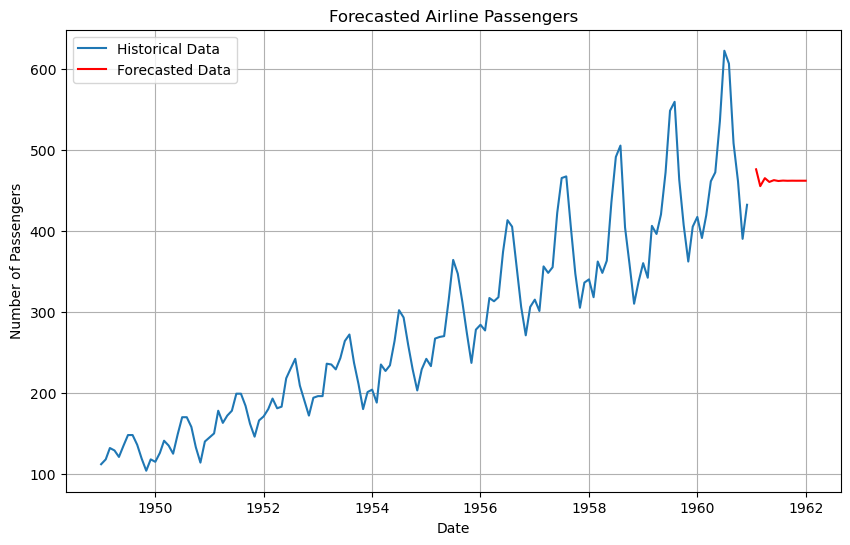

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Fitting ARIMA model (we'll use p=1, d=1, q=1 as an initial guess)
model = ARIMA(data['Passengers'], order=(1 ,1 ,1))
model_fit = model.fit()


# Forecasting the next 12 months (1 year)
forecast = model_fit.forecast(steps=12)
print('Forcasted values forr next 12 months : ', forecast)


# Ploting the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label='Historical Data')
plt.plot(pd.date_range(data.index[-1], periods=13, freq='M')[1:], forecast, label='Forecasted Data', color='red')
plt.title('Forecasted Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()


## Let's Improve the Model with SARIMA

C:\Users\adhik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Fri, 20 Dec 2024   AIC                           1022.299
Time:                                    23:50:12   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.357      0.721      -0.825       0.570
ma.L1         -0.2149      0.325   

C:\Users\adhik\AppData\Local\Temp\ipykernel_19360\2887508328.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=13, freq='M')[1:], forecast_sarima, label='Forecasted Data (SARIMA)', color='orange')


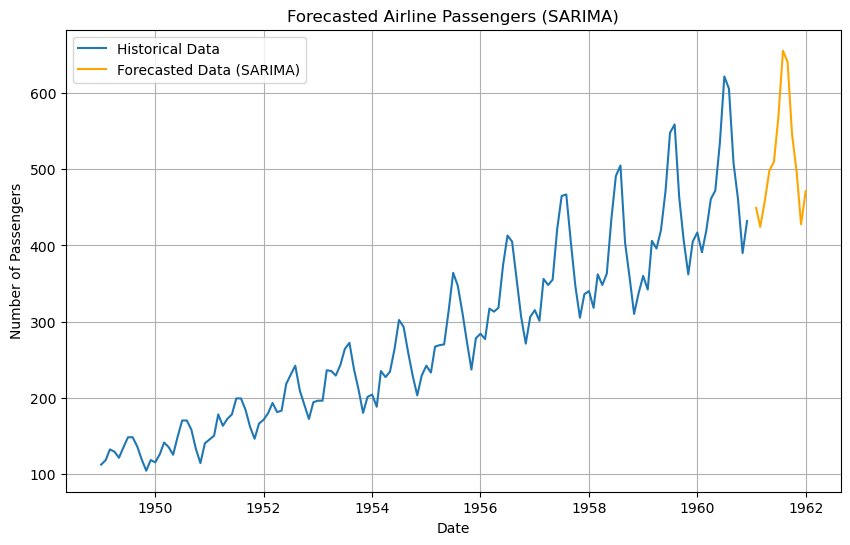

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Building SARIMA model (Seasonal ARIMA), with seasonal order (P=1, D=1, Q=1, m=12)
sarima_model = SARIMAX(data['Passengers'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()

# Printing the summary of the SARIMA model
print(sarima_model_fit.summary())

# Forecasting the next 12 months (1 year)
forecast_sarima = sarima_model_fit.forecast(steps=12)
print('Forecasted values for the next 12 months (SARIMA):', forecast_sarima)

# Ploting the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label='Historical Data')
plt.plot(pd.date_range(data.index[-1], periods=13, freq='M')[1:], forecast_sarima, label='Forecasted Data (SARIMA)', color='orange')
plt.title('Forecasted Airline Passengers (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()
